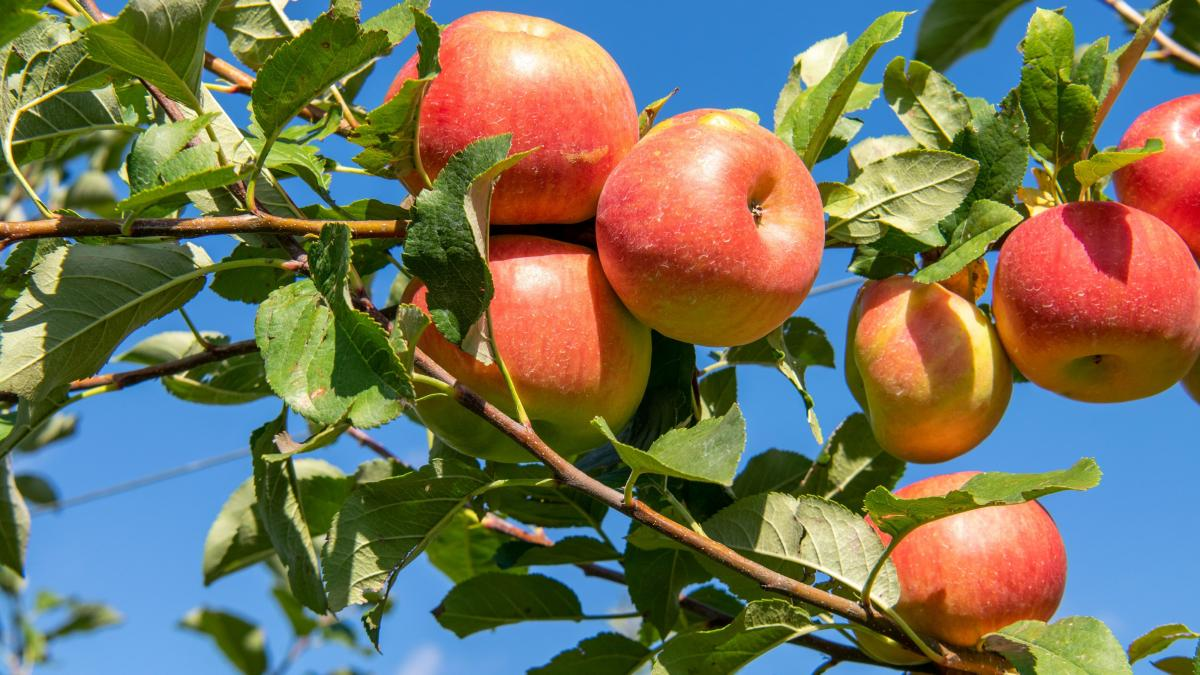

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
       Description
    </p>
</div>


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
       This dataset contains information about different types of fruits, including their size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality. It appears to be a dataset used for analyzing the quality of various fruits.
    </p>
</div>


Columns :
* index: The index of the dataframe.
* A_id: The ID of the item.
* Size: The size of the item in some unit of measurement.
* Weight: The weight of the item in some unit of measurement.
* Sweetness: The level of sweetness of the item on a scale from very sweet to very sour.
* Crunchiness: The level of crunchiness of the item on a scale from very soft to very crunchy.
* Juiciness: The level of juiciness of the item on a scale from very dry to very juicy.
* Ripeness: The level of ripeness of the item on a scale from unripe to overripe.
* Acidity: The level of acidity of the item on a scale from very low to very high.
* Quality: The overall quality rating of the item, either "good" or "bad".

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      1. Import Libraries
    </p>
</div>


In [ ]:
!pip install -r requirements.txt

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")


<div style="background-color:#BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      2. Import Data
    </p>
</div>


In [ ]:
df = pd.read_csv("./data/apple_quality.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.duplicated().sum()

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

In [ ]:
df.duplicated().sum()

In [ ]:
df[df.isnull().any(axis = 1)]

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3. Exploration Data
    </p>
</div>


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.1  Clean Data
    </p>
</div>


In [ ]:
def clean_data(apples: pd.DataFrame):
    """Basic setting of columns to correct types
    """
    df = apples.copy()
    df = df.drop(columns=['A_id'])
    df = df.dropna()
    df = df.astype({x: "float64" for x in df.columns if x != "Quality"})
    return df

df_clean = clean_data(df)
df_clean.head()


In [ ]:
df_clean.info()

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2  Visualization
    </p>
</div>


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2.1  Univariate 
    </p>
</div>


In [ ]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Label']

plt.figure(figsize=(15, 10))
sns.set_palette("tab10")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_clean, x=column, kde=True, bins=20)  # Use sns.histplot for newer versions
    plt.title(column)

plt.tight_layout()
plt.show()


In [ ]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity','Label']

plt.figure(figsize=(15, 10))
sns.set_palette("Set1")
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_clean[column])
    plt.title(column)

plt.tight_layout()
plt.show()


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2.2  Bivariate 
    </p>
</div>


In [ ]:
plt.figure(figsize=(15, 10))
sns.set_palette("Set2")

for i, column in enumerate(df_clean.columns[:-1]):  
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Label', y=column, data=df_clean)
    plt.title(f'{column} by Label')

plt.tight_layout()
plt.show()


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2.3  Multivariate 
    </p>
</div>


In [ ]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Size', y='Weight', hue='Label', data=df_clean, palette='tab10', s=9)

In [ ]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Sweetness', y='Crunchiness', hue='Label', data=df_clean, palette='tab10', s=9)

In [ ]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Ripeness', y='Juiciness', hue='Label', data=df_clean, palette='tab10', s=9)

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.3  Correlation Heatmap
    </p>
</div>


In [ ]:
corr = df_clean.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4. Preprocesing
    </p>
</div>
